In [1]:
# get wetness gradient data! reproject and interp!
import xarray as xr

In [2]:
# load wetness gradient, read doc 
wetness_grad = xr.open_dataset('/mnt/data7/nfs4/avh_lst/sdupuis/ESACCI-PERMAFROST-L4-CLS-SENTINEL1_2_KMLH-AREA18_LCU_ALASK-2016-2024-fv02.0.tif')


In [4]:
wetness_grad

<xarray.Dataset>
Dimensions:      (band: 1, x: 172899, y: 204732)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.119e+06 -2.119e+06 ... -3.9e+05 -3.9e+05
  * y            (y) float64 3.784e+06 3.784e+06 ... 1.736e+06 1.736e+06
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [14]:
snippet = wetness_grad['band_data'].sel(y=slice(3420000,2850000), x=slice(-1086578,-925678)).coarsen(y=100, x=100, boundary="trim").mean()

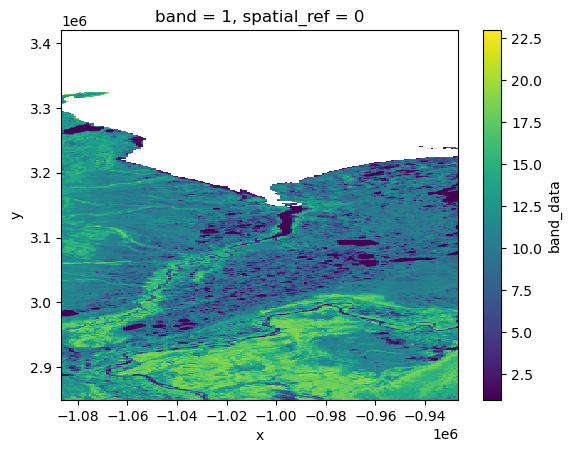

In [13]:
# use most ferquent !!!¨
wetness_grad['band_data'].sel(y=slice(3420000,2850000), x=slice(-1086578,-925678)).coarsen(y=100, x=100, boundary="trim").mean().plot();


In [17]:
snippet_2 = wetness_grad['band_data'].coarsen(y=100, x=100, boundary="trim").mean()

MemoryError: Unable to allocate 32.9 GiB for an array with shape (1, 204700, 172800) and data type uint8

In [15]:
# reproject small snippet
xds_lonlat = snippet.rio.reproject("EPSG:4326")

/local/sdupuis/software/conda/envs/rioxarray_env/lib/python3.11/site-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


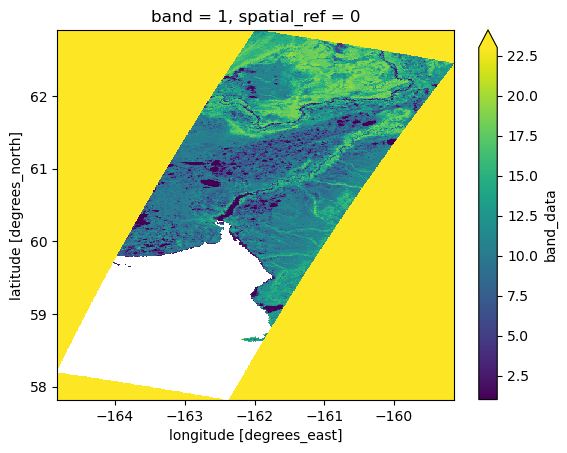

In [16]:
xds_lonlat.plot(vmax=23);

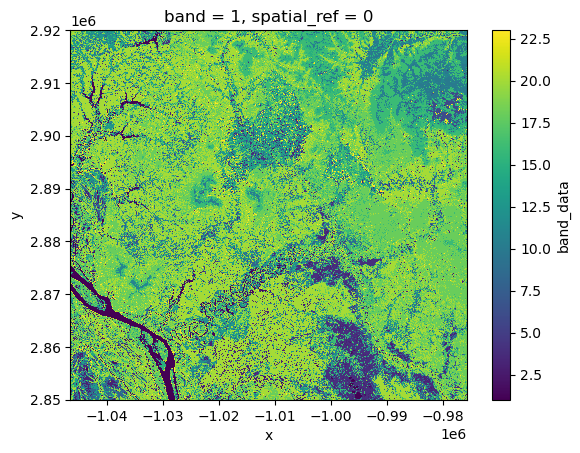

In [6]:
wetness_grad['band_data'].sel(y=slice(2920000,2850000), x=slice(-1046578,-975678)).plot();

In [18]:
alaska = xr.open_dataset('../alaska_wt_gradients.nc')

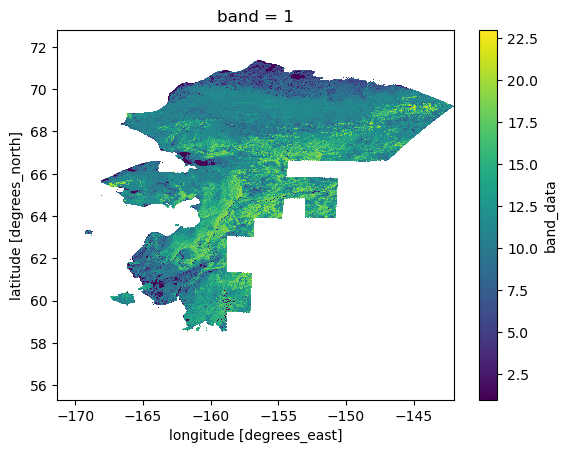

In [20]:
alaska['band_data'].plot();